In [1]:
import rasterio
import numpy
import math
from matplotlib import pyplot as plt

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_file = "FILEPATH_HERE"

# Use Rasterio to open the image.
satdat = rasterio.open(image_file)

In [2]:
# Load the 4 bands into 2d arrays - recall that we previously learned PlanetScope band order is BGRN.
blue, green, red, nir = satdat.read()

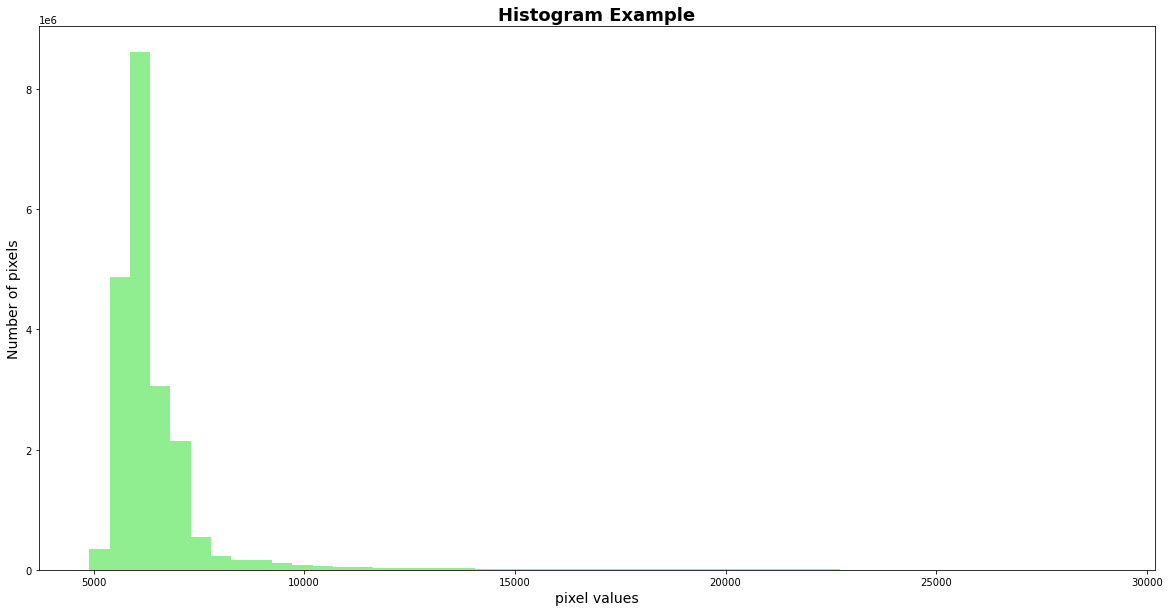

In [14]:
# Define a new figure
fig2 = plt.figure(figsize=(20,10))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("Histogram Example", fontsize=18, fontweight='bold')
plt.xlabel("pixel values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

# let's plot non-null red band values as an example
# For the x-axis, we want to count every pixel that has a value
x = blue[numpy.not_equal(blue, satdat.nodata)]

# Define the number of bins to divide the data into
bins = 50

# Define a color for the histogram
# You can use https://matplotlib.org/2.0.0/examples/color/named_colors.html as a reference
color = 'lightgreen'

# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins,color=color)

# Save the generated figure to an external image file
fig2.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# Finally - let's take a look!
plt.show()

We can see that most of the blue band values in our image seem to be around the 7000 range. In our image, this corresponds to the value of the blue band when we are looking at flooded areas. It makes sense then that most of the blue band would correspond to water values!!